In [2]:
import live_trading_indicators as lti

indicators = lti.Indicators('binance')
ohlcv = indicators.OHLCV('ethusdt', '4h', '2022-07-01', '2022-07-01')
ohlcv

(OHLCV data) source: binance, symbol: ethusdt, timeframe: 4h
date: 2022-07-01T00:00 - 2022-07-01T20:00 (length: 6) 
empty bars: count 0 (0.00 %), max consecutive 0
Values: time, open, high, low, close, volume

In [2]:
dataframe = ohlcv.pandas()
dataframe.head()

,time,open,high,low,close,volume
0,2022-07-01 00:00:00,1071.02,1117.00,1050.46,1054.52,430646.8720
1,2022-07-01 04:00:00,1054.52,1076.43,1045.41,1066.81,275557.9328
2,2022-07-01 08:00:00,1066.81,1086.44,1033.44,1050.22,252105.5665
3,2022-07-01 12:00:00,1050.21,1074.23,1043.00,1056.86,298465.0695
4,2022-07-01 16:00:00,1056.86,1083.10,1054.82,1067.91,158796.2248


In [3]:
indicators = lti.Indicators('ccxt.bybit')
macd = indicators.MACD('ETHUSDT', '1h', '2022-07-01', '2022-07-30', period_short=15, period_long=26, period_signal=9)
macd[40:].pandas().head()

,time,macd,signal,hist
0,2022-07-02 16:00:00,-1.661969,-3.514499,1.852530
1,2022-07-02 17:00:00,-0.983912,-3.125461,2.141548
2,2022-07-02 18:00:00,-0.081701,-2.617233,2.535532
3,2022-07-02 19:00:00,0.464134,-2.064394,2.528529
4,2022-07-02 20:00:00,0.828222,-1.477419,2.305641


In [4]:
import pandas

dataframe = pandas.read_csv('ETHUSDT-1m-2022-08-15.zip', header=None)
dataframe.rename(columns={0: 'time', 1: 'open', 2: 'high', 3: 'low', 4: 'close', 5: 'volume', }, inplace=True)
indicators = lti.Indicators(dataframe)
macd = indicators.MACD(period_short=15, period_long=26, period_signal=9)
macd[40:].pandas().head()

,time,macd,signal,hist
0,2022-08-15 00:40:00,3.403958,2.320975,1.082984
1,2022-08-15 00:41:00,3.540428,2.643593,0.896835
2,2022-08-15 00:42:00,3.594786,2.930063,0.664722
3,2022-08-15 00:43:00,3.684476,3.170449,0.514027
4,2022-08-15 00:44:00,3.763257,3.354183,0.409074


In [5]:
import datetime as dt

utcnow = dt.datetime.utcnow()
print(f'Now is {utcnow} UTC')
indicators = lti.Indicators('binance', utcnow - dt.timedelta(minutes=3))
ohlcv = indicators.OHLCV('btcusdt', '1m')
ohlcv.pandas()

Now is 2023-01-04 21:07:18.509962 UTC
2023-01-05 00:07:18:root:240073:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-04T00:00:00.000, bars: 1000
2023-01-05 00:07:19:root:240073:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-04T16:40:00.000, bars: 268


,time,open,high,low,close,volume
0,2023-01-04 21:04:00,16799.71,16809.13,16799.09,16805.37,170.13089
1,2023-01-04 21:05:00,16805.96,16813.00,16803.91,16809.46,129.13071
2,2023-01-04 21:06:00,16809.46,16810.24,16807.45,16808.07,46.24714


In [6]:
utcnow = dt.datetime.utcnow()
print(f'Now is {utcnow} UTC')
indicators = lti.Indicators('binance', utcnow - dt.timedelta(minutes=3))
ohlcv = indicators.OHLCV('btcusdt', '1m')
ohlcv.pandas()

Now is 2023-01-04 21:07:19.708629 UTC
2023-01-05 00:07:20:root:240073:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-04T00:00:00.000, bars: 1000
2023-01-05 00:07:20:root:240073:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-04T16:40:00.000, bars: 268


,time,open,high,low,close,volume
0,2023-01-04 21:04:00,16799.71,16809.13,16799.09,16805.37,170.13089
1,2023-01-04 21:05:00,16805.96,16813.00,16803.91,16809.46,129.13071
2,2023-01-04 21:06:00,16809.46,16810.24,16807.45,16808.07,46.24714


In [7]:
utcnow = dt.datetime.utcnow()
print(f'Now is {utcnow} UTC')
indicators = lti.Indicators('binance', utcnow - dt.timedelta(minutes=3), with_incomplete_bar=True)
ohlcv = indicators.OHLCV('btcusdt', '1m')
ohlcv.pandas()

Now is 2023-01-04 21:07:20.896275 UTC
2023-01-05 00:07:21:root:240073:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-04T00:00:00.000, bars: 1000
2023-01-05 00:07:21:root:240073:175 INFO Download using binance symbol btcusdt timeframe 1m from 2023-01-04T16:40:00.000, bars: 268


,time,open,high,low,close,volume
0,2023-01-04 21:04:00,16799.71,16809.13,16799.09,16805.37,170.13089
1,2023-01-04 21:05:00,16805.96,16813.00,16803.91,16809.46,129.13071
2,2023-01-04 21:06:00,16809.46,16810.24,16807.45,16808.07,46.24714
3,2023-01-04 21:07:00,16808.59,16808.80,16800.11,16803.30,87.37166


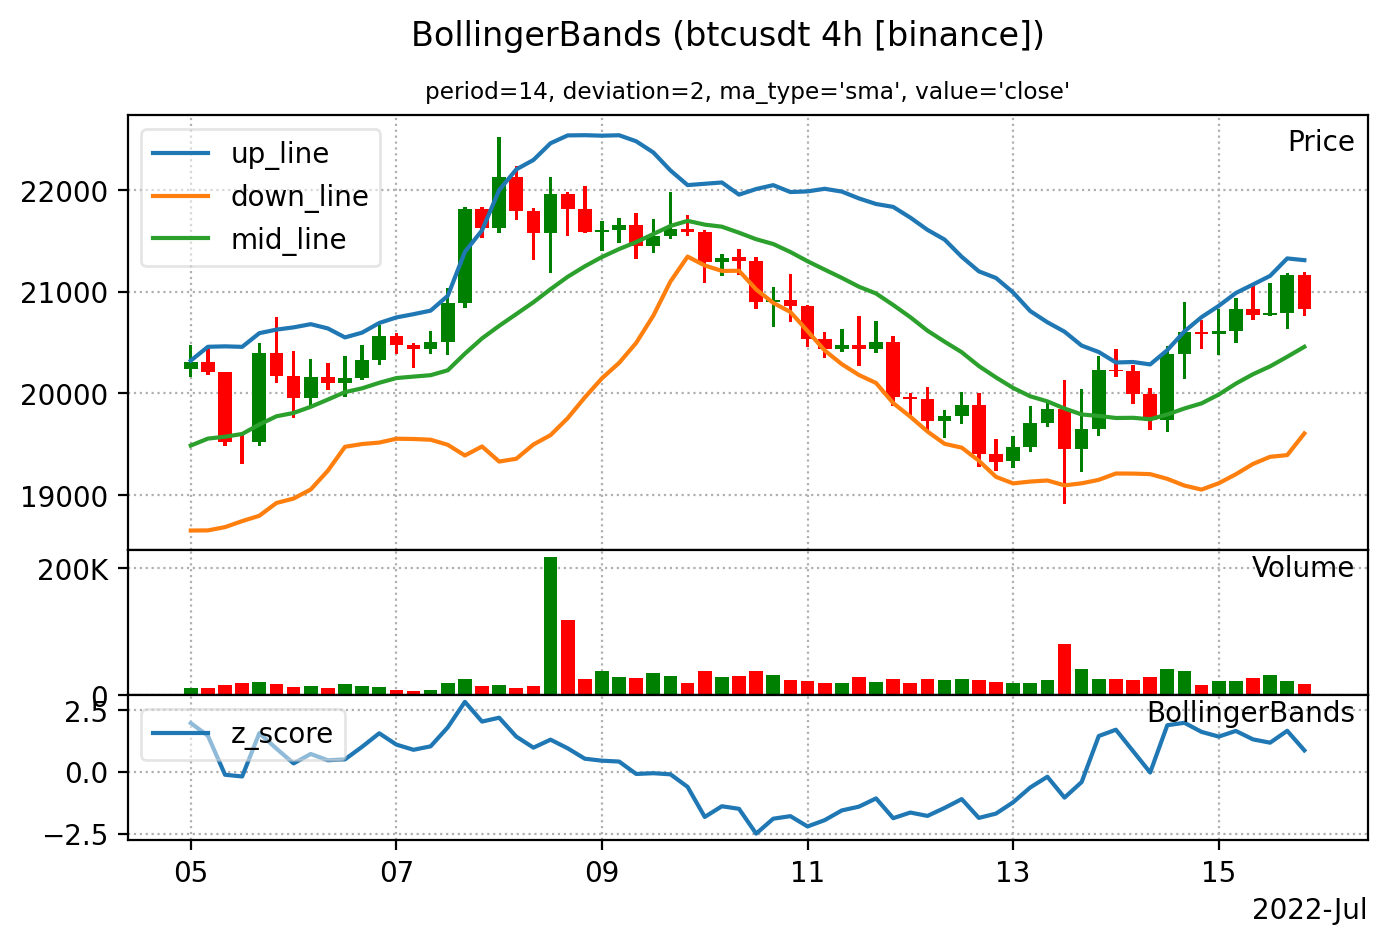

In [8]:
indicators = lti.Indicators('binance', '2022-07-01', '2022-07-15')
bb = indicators.BollingerBands('btcusdt', '4h', '2022-07-05', '2022-07-15', period=14)
bb.show()

In [4]:
# List of supported indicators
lti.help(2)

- ADL(ma_period=None, ma_type='sma') - Accumulation/distribution line.
- ADX(period=14, smooth=14, ma_type='mma') - Average directional movement index.
- ATR(smooth=14, ma_type='mma') - Average true range.
- Aroon(period=14) - Aroon oscillator.
- Awesome(period_fast=5, period_slow=34, ma_type_fast='smw', ma_type_slow='sma', normalized=False) - Awesome oscillator.
- BollingerBands(period=20, deviation=2, ma_type='sma', value='close') - Bollinger bands.
- CCI(period=) - Commodity channel index.
- EMA(period=, value='close') - Exponential moving average.
- Keltner(period=10, multiplier=1, period_atr=10, ma_type='ema', ma_type_atr='mma') - Keltner channel.
- MA(period=, value='close', ma_type='sma') - Moving average of different types: 'sma', 'ema', 'mma', 'ema0', 'mma0'
- MACD(period_short=, period_long=, period_signal=, ma_type='ema', ma_type_signal='sma', value='close') - Moving Average Convergence/Divergence.
- OBV() - On Balance Volume.
- OHLCV() - Quotes: open, high, low, close, volu